# Inteligência Computacional
## Homework
### Danilo Ren Nicioka - 201906840035

NA = 5<br>
NB = 3

## 1. A rede abaixo usa a função de ativação sigmóide em todos seus neurônios. A figura mostra a entrada e os pesos de cada conexão (recorde que NA e NB são oriundos do seu número de matrícula). Pede-se: a) qual o valor de saída do neurônio A (o mais acima da camada escondida)? b) qual o valor de saída da rede?

Dados:<br>
- Função Sigmoide:
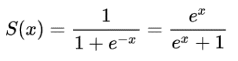

- Rede:
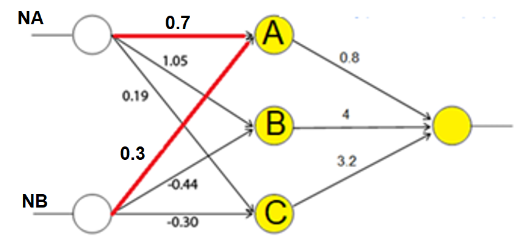

Passos:<br>
1. Multiplica entrada pelos pesos e soma os resultados
2. Passar por função de ativação (sigmoide) => classificação binária, geralmente
3. Após passar pela sigmoide de cada neurônio, deve-se multiplicar pelos pesos e somá-los
4. Aplicar a função de ativação com o resultado do passo 3.

### Resolução:

- Passo 1:<br>

    Neurônio A<br>
    $NA \cdot 0.7 + NB \cdot 0.3 = 5 \cdot 0.7 + 3 \cdot 0.3$<br>
    $3.5 + 0.9 =$ **4.4**

    Neurônio B:<br>
    $NA \cdot 1.05 + NB \cdot -0.44 = 5 \cdot 1.05 + 3 \cdot -0.44$<br>
    $5.25 - 1.32 = $ **3.93**

    Neurônio C:<br>
    $NA \cdot 0.19 + NB \cdot -0.3 = 5 \cdot 0.19 + 3 \cdot -0.3$<br>
    $0.95 - 0.9 = $ **0.05**

In [14]:
import numpy as np

# Passo 2:
X = [4.4, 3.93, 0.05]  # valores nos neurônios
exp_X = np.exp(X)  # e^x para calcular sigmoide
print("exp_X =",exp_X)

sig_X = []
for x in exp_X:
    sig_X.append(x/(x+1))  # calcula sigmoide
    
print("sigmoides =",sig_X)

# Passo 3:
pesos = [0.8, 4, 3.2]
saidas_n = []

for i in range(len(pesos)):
    saidas_n.append(pesos[i]*sig_X[i]) # multiplica sigmoides pelos pesos para obter saídas dos neurônios

print("\nsaidas_neuronios =",saidas_n)

# Passo 4:
soma = 0
for x in saidas_n:
    soma+=x # soma saídas dos neurônios
    
print("soma_saidas",soma)
    
exp_soma = np.exp(soma)
print("\nexp_soma =",exp_soma)
saida_rede = exp_soma/(exp_soma+1) # sigmoide na saída
print("saida_rede =",saida_rede)

exp_X = [81.45086866 50.90697767  1.0512711 ]
sigmoides = [0.9878715650157258, 0.9807347673684084, 0.5124973964842103]

saidas_neuronios = [0.7902972520125807, 3.9229390694736335, 1.639991668749473]
soma_saidas 6.353227990235687

exp_soma = 574.3436957646874
saida_rede = 0.9982619084777301


Detalhe dos passos feitos no código:<br>
- Passo 2: Entradas dos neurônios

    Neurônio A<br>
    $S(4.4) = {e^{4.4} \over e^{4.4} + 1}$<br>
    $S(4.4) = {81.45086866 \over 82.45086866}$<br>
    $S(4.4) = 0.9878715650157258$
    
    Neurônio B<br>
    $S(3.93) = {e^{3.93} \over e^{3.93} + 1}$<br>
    $S(3.93) = {50.90697767 \over 51.90697767}$<br>
    $S(3.93) = 0.9807347673684084$
    
    Neurônio C<br>
    $S(0.05) = {e^{0.05} \over e^{0.05} + 1}$<br>
    $S(0.05) = {1.0512711 \over 2.0512711}$<br>
    $S(0.05) = 0.5124973964842103$

<br>

- Passo 3: Saídas dos neurônios

    Neurônio A<br>
    $0.9878715650157258 \cdot 0.8 = $ **0.7902972520125807**

    Neurônio B:<br>
    $0.9807347673684084 \cdot 4 = $ **3.9229390694736335**

    Neurônio C:<br>
    $0.5124973964842103 \cdot 3.2 = $ **1.639991668749473**
    
    Soma das saídas:<br>
    $0.7902972520125807 + 3.9229390694736335 + 1.639991668749473 = $ 6.353227990235687
   
<br>

- Passo 4: Saída da rede

    $S(6.353227990235687) = {e^{6.353227990235687} \over e^{6.353227990235687} + 1}$<br>
    $S(6.353227990235687) = {574.3436957646874 \over 575.3436957646874}$<br>
    $S(6.353227990235687) = $ **0.9982619084777301**

### Resposta

a) Valor da saída do neurônio A é 0.7902972520125807

b) Valor da saída da rede é 0.9982619084777301

### 2.
Filtros fazem convolução com matriz de entrada.
depth -> número de matrizes de entrada compostas
filtro -> agrupamento de kernels, pode ter profundidade tb
    os filtros devem ter mesma profundidade da entrada, pois a convolução será feita com as depth correspondentes
    o resultado de cada convolução deverá ser somado, ou seja, haverá uma única matriz com os valores somados
    cada matriz do filtro é um kernel, o kernel é o todo
    
convolução -> multiplicação por seu correposdente (tipo produto interno), como a matriz de entrada é maior, a divide em vários do tamanho do kernel (quadrado na superior esquerda sempre é o primeiro, dps o quadrado da superior direita, etc)
    após a multiplicação de cada elemento, soma pra formar um único elemento
    
stride -> deslocamento na linha e na coluna (2,1)
    define quais quadrados serão selecionados para multiplicação. Após a superior esquerda, move 1 coluna pra direita.
    
padding -> forma de manter a mesma dimensão após passar pelo filtro
    padding=same, mantém msm dimensão da entrada
    padding=valid, não precisa manter
    zero padding -> coloca zeros em volta da entrada para manter a mesma dimensão da matriz de entrada no final
    
bias -> soma em cada valor da matriz do resultado

relu -> negativos viram 0, positivos mantêm
sigmoide é a mesma da primeira questão

### 3. 
convolução de cada entrada com filtro correspondente e dps soma
isso para cada filtro(F,G e H)
os resultados não devem ser somados, serão 3 matrizes (depth = 3), ou seja, cada filtro gera um depth

número de parâmetros: (linhas_kernel\*colunas_kernel\*depth_entrada+bias).filtros

### 4.
dimensão do tensor de saída de cada uma das seis camadas:


número de parâmetros treináveis


dados
kernel 20x10
padding -> considera valid quando n é especificado
G = N-F/S + 1 -> aplicar em cada dimensão (linha, coluna)

G = ((input_shape - 20) / 4) + 1 -> lsaída da linha 


Com todas essas saídas, usa elas como input_shape para a próxima camada, a maxpooling, no caso

flatten -> dimensão de saída -> multiplicação de todas as saídas da camada anterior


parâmetros treináveis -> mesma fórmula da questão anterior
maxpooling não tem parâmetros treináveis (0), só pega valor máximo
dense -> flatten + 1(bias) e multiplicar por 2(densa)